# Лабораторна робота 8

# Тема. Структура даних граф. Алгоритми на графах
# Мета: засвоїти представлення структури даних граф та основні алгоритми роботи з ними засобами Python.

## 1.Візуалізація граф за допомогою коду.

In [ ]:
# Побудова графа
G = nx.DiGraph()  # Використовуємо спрямований граф (можна змінити на Graph для нес напрямленого)
G.add_edges_from([
    ('A', 'B'),
    ('A', 'C'),
    ('B', 'D'),
    ('B', 'E'),
    ('C', 'F'),
    ('E', 'F')
])

# Пошук у ширину (BFS) для знаходження всіх шляхів
def bfs_paths(graph, start, goal):
    queue = [(start, [start])]
    while queue:
        (vertex, path) = queue.pop(0)
        for next in set(graph[vertex]) - set(path):
            if next == goal:
                yield path + [next]
            else:
                queue.append((next, path + [next]))

# Виведення всіх шляхів від 'A' до 'F'
paths = list(bfs_paths(G, 'A', 'F'))
print("Усі шляхи від A до F:", paths)

# Візуалізація графа
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color='gray', node_size=2000, font_size=16)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): '' for u, v in G.edges()})
plt.title("Візуалізація графа")
plt.show()

## 2.Результат роботи коду:

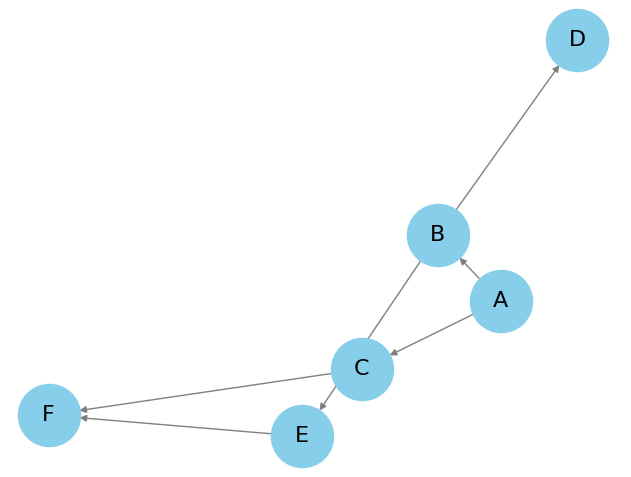

## 3.Алгоритм Дейкстри коду:

In [ ]:
# Алгоритм Дейкстри для знаходження найкоротшого шляху від A до F
dijkstra_path = nx.dijkstra_path(G, 'A', 'F')
dijkstra_length = nx.dijkstra_path_length(G, 'A', 'F')

print("Алгоритм Дейкстри:")
print("Шлях від A до F:", dijkstra_path)
print("Загальна довжина шляху:", dijkstra_length)

## 4.Алгоритм Беллмана-Форда коду:

In [ ]:
# Алгоритм Беллмана-Форда для знаходження найкоротшого шляху від A до F
bellman_ford_path = nx.bellman_ford_path(G, 'A', 'F')
bellman_ford_length = nx.bellman_ford_path_length(G, 'A', 'F')

print("Алгоритм Беллмана-Форда:")
print("Шлях від A до F:", bellman_ford_path)
print("Загальна довжина шляху:", bellman_ford_length)

## 5.Алгоритм Пошук у ширину коду:

In [ ]:
# Пошук у ширину з вершини A
def bfs(graph, start):
    visited = set()
    queue = [start]
    order = []
    while queue:
        vertex = queue.pop(0)
        if vertex not in visited:
            visited.add(vertex)
            order.append(vertex)
            queue.extend(set(graph[vertex]) - visited)
    return order

print("Пошук у ширину (BFS):")
print("Порядок обходу з A:", bfs(G, 'A'))

## 6.Алгоритм Пошук у глибину  коду:

In [ ]:
# Пошук у глибину з вершини A
def dfs(graph, start, visited=None):
    if visited is None:
        visited = set()
    visited.add(start)
    order = [start]
    for neighbor in graph[start]:
        if neighbor not in visited:
            order.extend(dfs(graph, neighbor, visited))
    return order

print("Пошук у глибину (DFS):")
print("Порядок обходу з A:", dfs(G, 'A'))

## 7.Відповіді на запитання:

1. Що таке граф у термінах теорії графів? Наведіть приклади реальних ситуацій, де можна застосовувати графи.

Граф — це математична структура, яка складається з вершин (вузлів) і ребер (з'єднань) між ними.
Приклади застосування: соціальні мережі, дорожні карти, комп’ютерні мережі, маршрути доставки.

2. Які основні види графів існують? Наведіть відмінності між орієнтованими і неорієнтованими графами.

Основні види графів:

Орієнтований граф: ребра мають напрямок (наприклад, A → B).

Неорієнтований граф: ребра без напрямку (наприклад, A — B).
Відмінність: напрямок ребра важливий в орієнтованих графах, а в неорієнтованих — ні.

3.  Як можна представити граф у пам’яті комп'ютера? Опишіть структури даних, які використовуються для зберігання графів.

Список суміжності — зберігає кожну вершину з переліком її сусідів (ефективно за пам’яттю).

Матриця суміжності — квадратна матриця, де зберігається наявність ребра між вершинами (зручно для щільних графів).

4. Як працює алгоритм пошуку в ширину (BFS) на графах? Наведіть приклади ситуацій, де застосовується цей алгоритм.

Алгоритм проходить граф рівень за рівнем від стартової вершини, використовуючи чергу.

Приклади застосування: пошук найкоротшого шляху у невзважених графах, перевірка зв’язності.

5. Що таке алгоритм пошуку в глибину (DFS) на графах? Як він відрізняється від BFS? Дайте приклади задач, де використовується DFS.

Алгоритм заглиблюється якнайдалі по кожному шляху, використовуючи стек або рекурсію.

Відмінність від BFS: DFS іде в глибину, BFS — вшир.

Приклади задач: знаходження компонент зв’язності, топологічне сортування.

6. Опишіть алгоритм Дейкстри для пошуку найкоротшого шляху в графі. Які умови повинні виконуватися для успішної роботи цього алгоритму? можешь відповісти коротко

Алгоритм Дейкстри:

Знаходить найкоротші шляхи від початкової вершини до всіх інших у зваженому графі без від’ємних ваг.

Умови: усі ваги ребер повинні бути невід’ємними.

## 8.Висновок:
Засвоїв представлення структури даних граф та основні алгоритми роботи з ними засобами Python.